In [2]:
from numpy.random import seed
import numpy as np
import pandas as pd
from os import listdir
from keras import backend as K
from keras.models import Model ,load_model
from keras.layers import Flatten, Dense, Dropout
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [3]:
data_list = listdir('content/two/train')
data_list

['covid', 'normal']

In [4]:
DATASET_PATH  = 'content/two/train'
test_dir =  'content/two/test'
IMAGE_SIZE    = (150, 150)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 20
LEARNING_RATE =0.0005 #start off with high rate first 0.001 #5e-4

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  fill_mode='constant')

C:\Users\kpbab\Anaconda3\envs\covid-19-detector-testing\lib\site-packages\keras_preprocessing\image\image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [6]:
train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="binary",
                                                 
                                                  )
valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="binary",
                                                  
                                                 
                                                  )

Found 106 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [7]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.trainable = False

In [8]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])

In [9]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [10]:
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,
#                         
                       )

11
3
Epoch 1/20


C:\Users\kpbab\Anaconda3\envs\covid-19-detector-testing\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\kpbab\Anaconda3\envs\covid-19-detector-testing\lib\site-packages\keras_preprocessing\image\image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 10s 973ms/step - loss: 1.1034 - acc: 0.4688 - val_loss: 0.4247 - val_acc: 0.5500
Epoch 2/20
10/10 [==============================] - 9s 876ms/step - loss: 0.5217 - acc: 0.7188 - val_loss: 0.4605 - val_acc: 0.7500
Epoch 3/20
10/10 [==============================] - 10s 959ms/step - loss: 0.4066 - acc: 0.8021 - val_loss: 0.3053 - val_acc: 0.8750
Epoch 4/20
10/10 [==============================] - 10s 1s/step - loss: 0.3111 - acc: 0.8700 - val_loss: 0.1862 - val_acc: 0.9000
Epoch 5/20
10/10 [==============================] - 9s 933ms/step - loss: 0.3461 - acc: 0.9062 - val_loss: 0.2930 - val_acc: 0.9375
Epoch 6/20
10/10 [==============================] - 9s 920ms/step - loss: 0.2668 - acc: 0.8958 - val_loss: 0.3048 - val_acc: 0.8750
Epoch 7/20
10/10 [==============================] - 9s 922ms/step - loss: 0.2933 - acc: 0.8913 - val_loss: 0.1565 - val_acc: 0.9000
Epoch 8/20
10/10 [==============================] - 9s 939ms/step - loss: 0.1589 - acc:

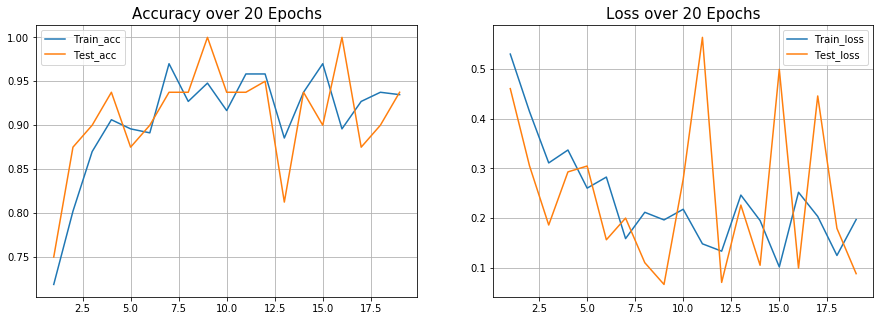

In [11]:
def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 20)

In [12]:
model.save('Covid_Binary.h5')

In [13]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=False,
        seed=42,
        
        
        class_mode="binary")
eval_generator.reset()

Found 18 images belonging to 2 classes.


In [14]:
eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])

2/2 [==============================] - 0s 170ms/step
Test loss: 0.04735570773482323
Test accuracy: 1.0


In [15]:
from keras.preprocessing import image
img_pred=image.load_img('content/two/test/covid/radiol.2020200490.fig3.jpeg',target_size=(150,150))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)
result=model.predict(img_pred)
print(result[0][0])
if result[0][0]==1:
    pred="normal"
else:
    pred="covid-19"
print(pred)

0.99998057
covid-19


In [16]:
eval_generator.reset()  
pred = model.predict_generator(eval_generator,1000,verbose=1)
print("Predictions finished")

1000/1000 [==============================] - 105s 105ms/step
Predictions finished


In [17]:
print(pred)

[[0.00746532]
 [0.04625192]
 [0.038597  ]
 [0.07459054]
 [0.02558916]
 [0.00952277]
 [0.01392321]
 [0.01099806]
 [0.0328148 ]
 [0.9823136 ]
 [0.90885943]
 [0.9851865 ]
 [0.9942221 ]
 [0.95000994]
 [0.8135321 ]
 [0.9217174 ]
 [0.9908941 ]
 [0.9606622 ]
 [0.00746532]
 [0.04625192]
 [0.038597  ]
 [0.07459054]
 [0.02558916]
 [0.00952277]
 [0.01392321]
 [0.01099806]
 [0.0328148 ]
 [0.9823136 ]
 [0.90885943]
 [0.9851865 ]
 [0.9942221 ]
 [0.95000994]
 [0.8135321 ]
 [0.9217174 ]
 [0.9908941 ]
 [0.9606622 ]
 [0.00746532]
 [0.04625192]
 [0.038597  ]
 [0.07459054]
 [0.02558916]
 [0.00952277]
 [0.01392321]
 [0.01099806]
 [0.0328148 ]
 [0.9823136 ]
 [0.90885943]
 [0.9851865 ]
 [0.9942221 ]
 [0.95000994]
 [0.8135321 ]
 [0.9217174 ]
 [0.9908941 ]
 [0.9606622 ]
 [0.00746532]
 [0.04625192]
 [0.038597  ]
 [0.07459054]
 [0.02558916]
 [0.00952277]
 [0.01392321]
 [0.01099806]
 [0.0328148 ]
 [0.9823136 ]
 [0.90885943]
 [0.9851865 ]
 [0.9942221 ]
 [0.95000994]
 [0.8135321 ]
 [0.9217174 ]
 [0.9908941 ]
 [0.96

In [18]:
for probability in enumerate(pred):
    print(probability)

(0, array([0.00746532], dtype=float32))
(1, array([0.04625192], dtype=float32))
(2, array([0.038597], dtype=float32))
(3, array([0.07459054], dtype=float32))
(4, array([0.02558916], dtype=float32))
(5, array([0.00952277], dtype=float32))
(6, array([0.01392321], dtype=float32))
(7, array([0.01099806], dtype=float32))
(8, array([0.0328148], dtype=float32))
(9, array([0.9823136], dtype=float32))
(10, array([0.90885943], dtype=float32))
(11, array([0.9851865], dtype=float32))
(12, array([0.9942221], dtype=float32))
(13, array([0.95000994], dtype=float32))
(14, array([0.8135321], dtype=float32))
(15, array([0.9217174], dtype=float32))
(16, array([0.9908941], dtype=float32))
(17, array([0.9606622], dtype=float32))
(18, array([0.00746532], dtype=float32))
(19, array([0.04625192], dtype=float32))
(20, array([0.038597], dtype=float32))
(21, array([0.07459054], dtype=float32))
(22, array([0.02558916], dtype=float32))
(23, array([0.00952277], dtype=float32))
(24, array([0.01392321], dtype=float32

(964, array([0.90885943], dtype=float32))
(965, array([0.9851865], dtype=float32))
(966, array([0.9942221], dtype=float32))
(967, array([0.95000994], dtype=float32))
(968, array([0.8135321], dtype=float32))
(969, array([0.9217174], dtype=float32))
(970, array([0.9908941], dtype=float32))
(971, array([0.9606622], dtype=float32))
(972, array([0.00746532], dtype=float32))
(973, array([0.04625192], dtype=float32))
(974, array([0.038597], dtype=float32))
(975, array([0.07459054], dtype=float32))
(976, array([0.02558916], dtype=float32))
(977, array([0.00952277], dtype=float32))
(978, array([0.01392321], dtype=float32))
(979, array([0.01099806], dtype=float32))
(980, array([0.0328148], dtype=float32))
(981, array([0.9823136], dtype=float32))
(982, array([0.90885943], dtype=float32))
(983, array([0.9851865], dtype=float32))
(984, array([0.9942221], dtype=float32))
(985, array([0.95000994], dtype=float32))
(986, array([0.8135321], dtype=float32))
(987, array([0.9217174], dtype=float32))
(988, 

In [16]:
import cv2

covid\nejmoa2001191_f3-PA.jpeg


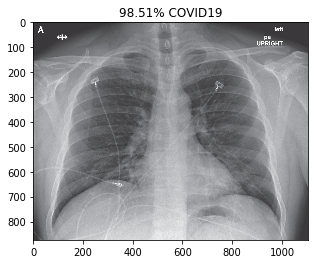

covid\nejmoa2001191_f4.jpeg


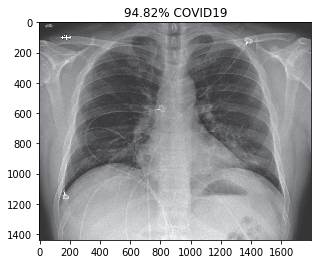

covid\nejmoa2001191_f5-PA.jpeg


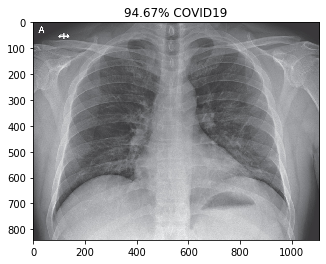

covid\radiol.2020200490.fig3.jpeg


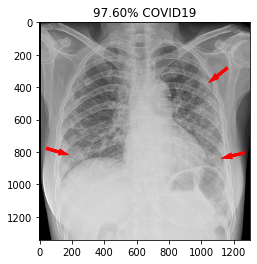

covid\ryct.2020200028.fig1a.jpeg


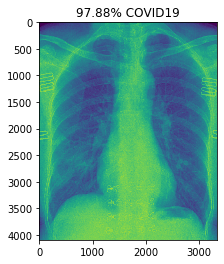

covid\ryct.2020200034.fig2.jpeg


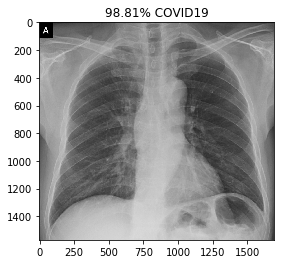

covid\ryct.2020200034.fig5-day0.jpeg


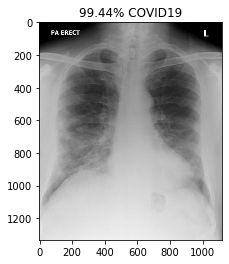

covid\ryct.2020200034.fig5-day4.jpeg


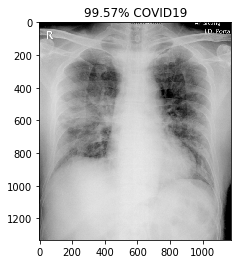

covid\ryct.2020200034.fig5-day7.jpeg


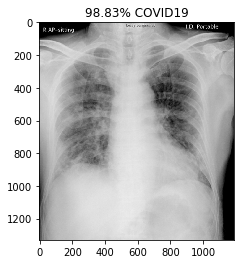

normal\NORMAL2-IM-1385-0001.jpeg


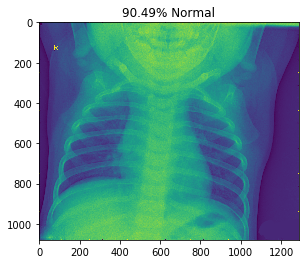

normal\NORMAL2-IM-1396-0001.jpeg


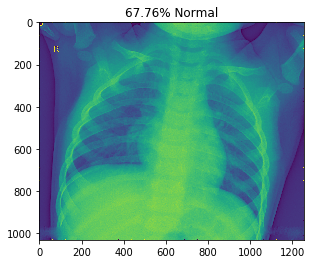

normal\NORMAL2-IM-1400-0001.jpeg


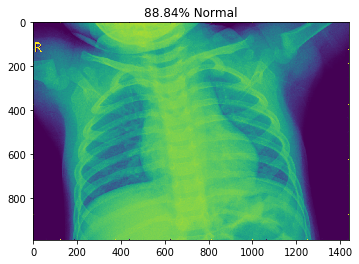

normal\NORMAL2-IM-1401-0001.jpeg


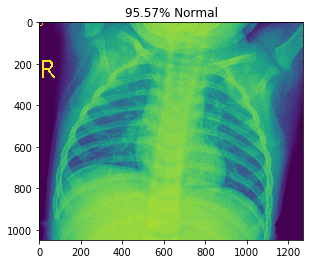

normal\NORMAL2-IM-1406-0001.jpeg


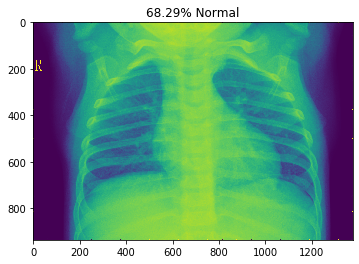

normal\NORMAL2-IM-1412-0001.jpeg


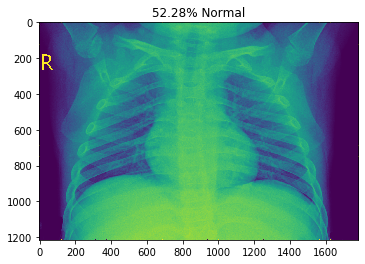

normal\NORMAL2-IM-1419-0001.jpeg


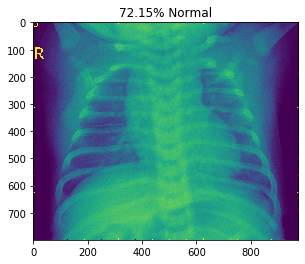

normal\NORMAL2-IM-1422-0001.jpeg


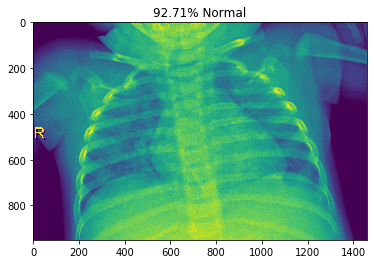

normal\NORMAL2-IM-1423-0001.jpeg


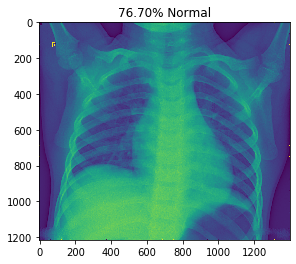

IndexError: list index out of range

In [18]:
for index, probability in enumerate(pred):
    image_path = test_dir + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    #BGR TO RGB conversion using CV2
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    

    pixels = np.array(image)
    plt.imshow(pixels)
    
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% COVID19")
    plt.show()